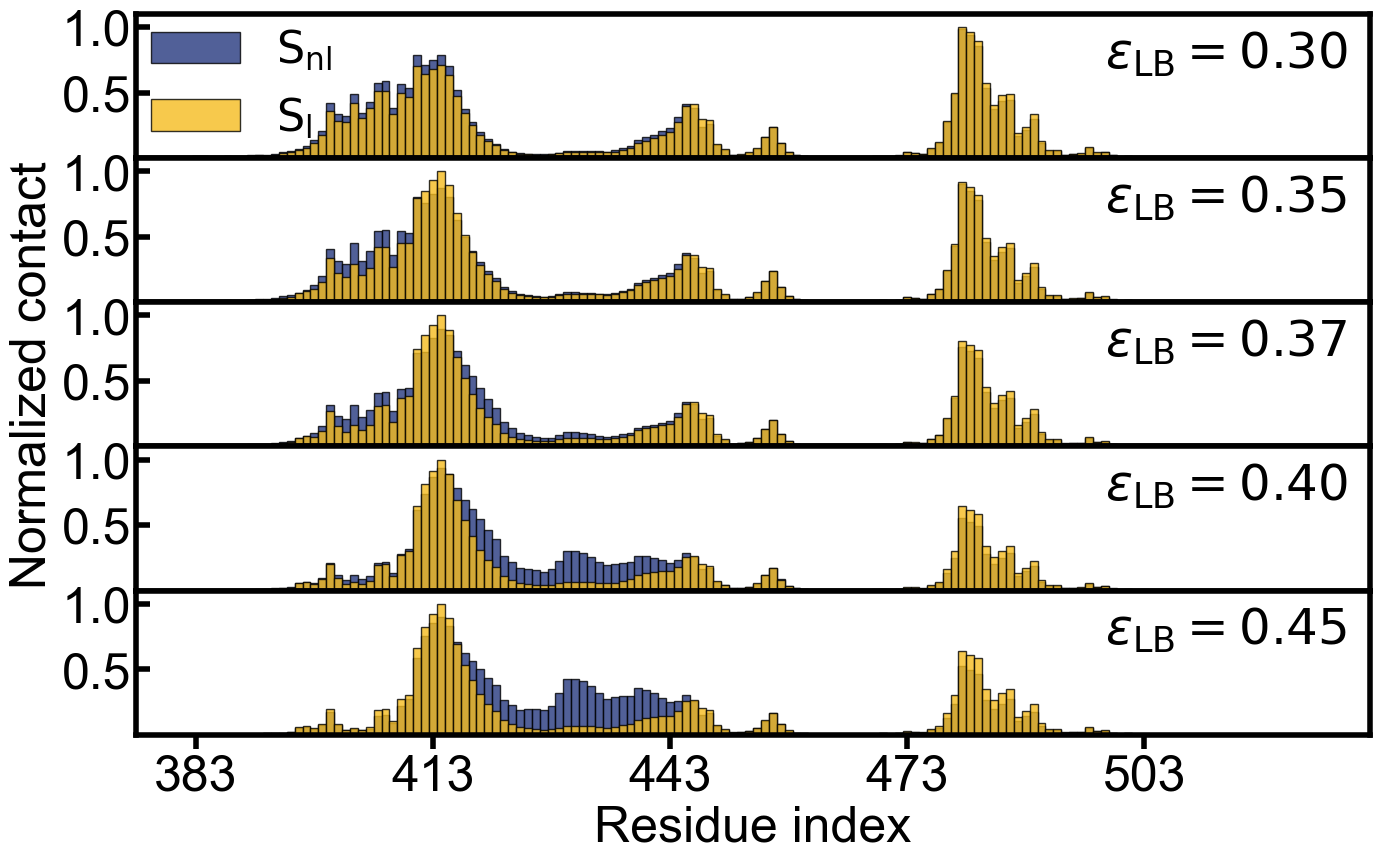

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Configure matplotlib
plt.rcParams.update({
    'font.family': 'Arial',
    'axes.titlesize': 36,
    'axes.labelsize': 36,
    'xtick.labelsize': 36,
    'ytick.labelsize': 36,
    'legend.fontsize': 32,
    'axes.linewidth': 4,
    'xtick.major.size': 10,
    'ytick.major.size': 10,
    'xtick.minor.size': 5,
    'ytick.minor.size': 5,
    'xtick.major.width': 4,
    'ytick.major.width': 4,
    'xtick.minor.width': 4,
    'ytick.minor.width': 4,
    'axes.grid': False,
})

def read_data_csv(filename):
    df = pd.read_csv(filename)
    resi_info = df['residue_index'].values
    q1_normalized = df['q1_normalized'].values  # S_nl data
    q2_normalized = df['q2_normalized'].values  # S_l data
    return resi_info, q1_normalized, q2_normalized

def create_stacked_plots():
    # List of all data files with their epsilon values
    data_files = [
        ("/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/contactnum/0.3/contact_data_0.3.csv", 0.30),
        ("/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/contactnum/0.35/contact_data_0.35.csv", 0.35),
        ("/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/contactnum/0.37/contact_data_0.37.csv", 0.37),
        ("/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/contactnum/0.4/contact_data_0.4.csv", 0.40),
        ("/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/contactnum/0.45/contact_data_0.45.csv", 0.45)
    ]
    
    # Create figure with 5 subplots stacked vertically
    fig, axes = plt.subplots(5, 1, figsize=(14, 9), sharex=True)
    
    bar_color1 = '#25387F'  # First bar color
    bar_color2 = '#F5BC1F'  # Second bar color
    width = 1.0  # Bar width
    
    # Plot each dataset in a separate subplot
    for i, (data_file, epsilon) in enumerate(data_files):
        ax = axes[i]
        resi_info, q1_normalized, q2_normalized = read_data_csv(data_file)
        
        # Plot the bars
        ax.bar(np.arange(len(resi_info)), q1_normalized, width=width, 
               color=bar_color1, label=r'$\text{S}_\text{nl}$', edgecolor='black', alpha=0.8)
        ax.bar(np.arange(len(resi_info)), q2_normalized, width=width, 
               color=bar_color2, label=r'$\text{S}_\text{l}$', edgecolor='black', alpha=0.8)
        
        # Set formatting
        ax.set_ylim(0, 1.1)
        ax.set_yticks([0.5,1])
        
        # Add epsilon value as text annotation in top-left corner
        ax.text(115, 0.8, f"$\\epsilon_\\text{{LB}} = {epsilon:.2f}$", 
                fontsize=36, ha='left', va='center')

        # Set tick directions
        if i == 4:
            ax.tick_params(axis='x', which='both', direction='out')
        ax.tick_params(axis='y', which='both', direction='in')
        
        # Only add legend to the top subplot
        if i == 0:
            ax.legend(loc='lower left',ncol=1, frameon=False,bbox_to_anchor=(-0.02, -0.15))
        
        # Add y-axis label only to the middle subplot
        if i == 2:
            ax.set_ylabel('Normalized contact')
    
    # Add x-axis label to the bottom subplot
    axes[-1].set_xlabel('Residue index')
    
    # Set x-ticks on the bottom subplot
    plt.xticks(np.arange(0, len(resi_info), 30), resi_info[::30], rotation=0)
    
    plt.tight_layout()
    plt.subplots_adjust(hspace=0)  # Reduced spacing between subplots now that titles are gone
    
    # Save the figure
    plt.savefig("all_resi_norcontacts.png", dpi=300, bbox_inches='tight')
    plt.show()

# Main execution
if __name__ == "__main__":
    create_stacked_plots()

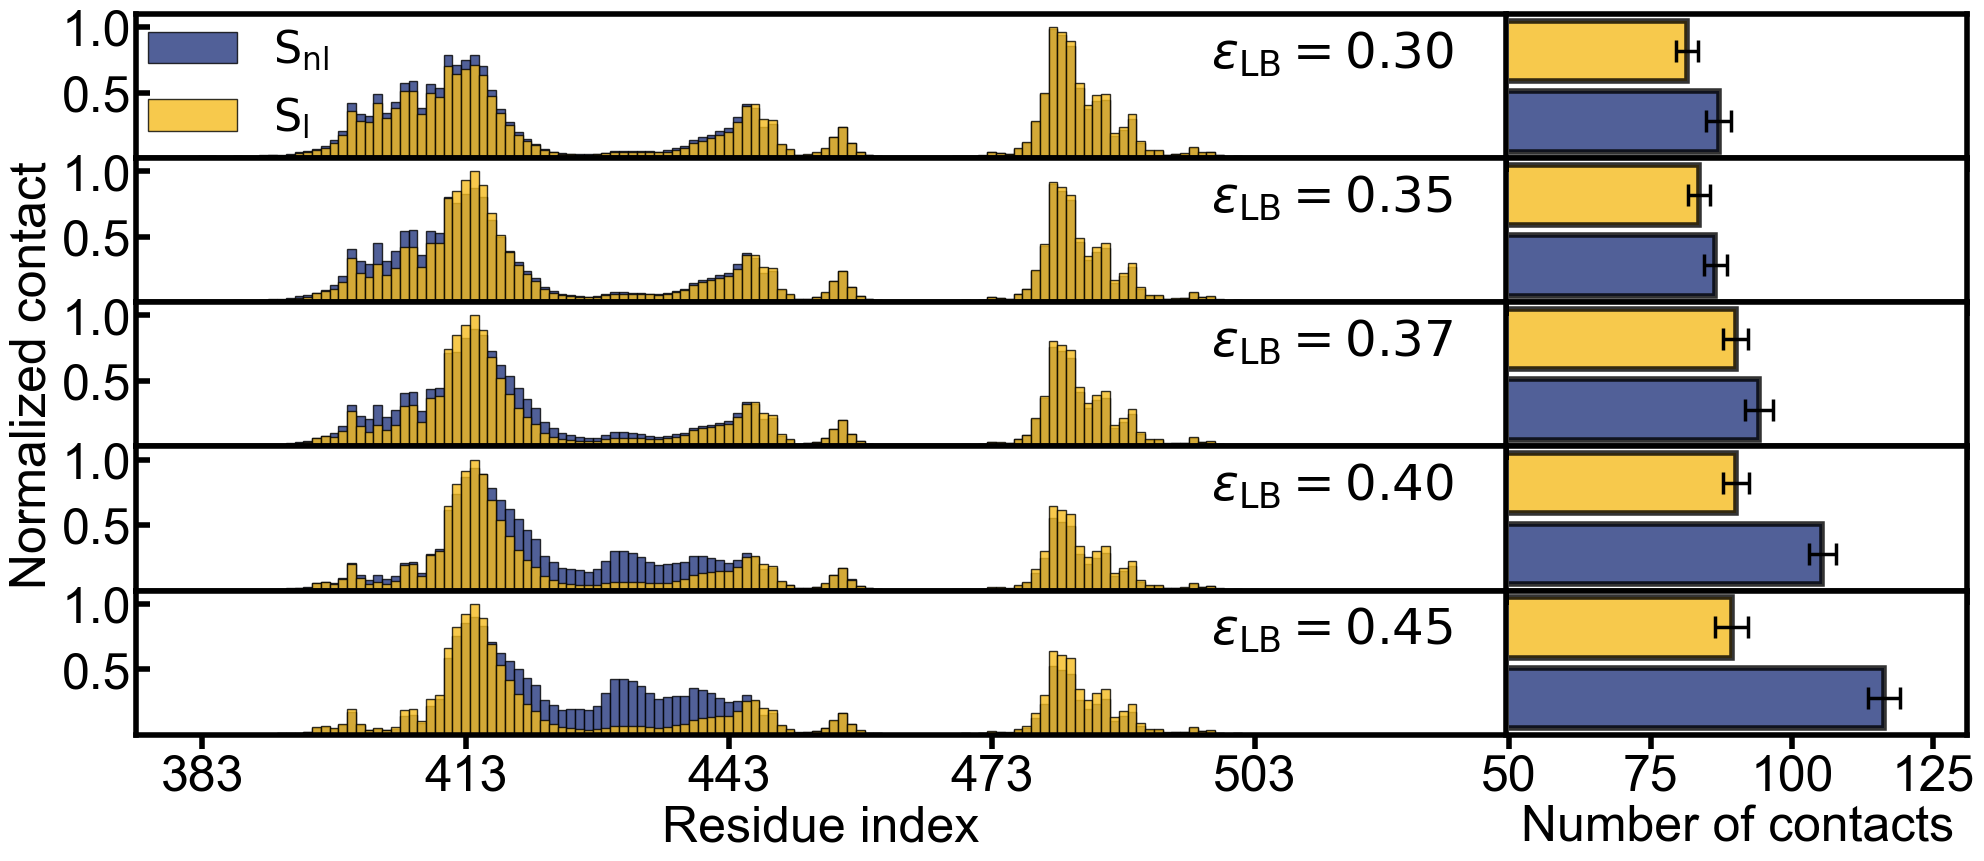

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.gridspec import GridSpec

# Configure matplotlib
plt.rcParams.update({
    'font.family': 'Arial',
    'axes.titlesize': 36,
    'axes.labelsize': 36,
    'xtick.labelsize': 36,
    'ytick.labelsize': 36,
    'legend.fontsize': 32,
    'axes.linewidth': 4,
    'xtick.major.size': 10,
    'ytick.major.size': 10,
    'xtick.minor.size': 5,
    'ytick.minor.size': 5,
    'xtick.major.width': 4,
    'ytick.major.width': 4,
    'xtick.minor.width': 4,
    'ytick.minor.width': 4,
    'axes.grid': False,
})

def read_data_csv(filename):
    df = pd.read_csv(filename)
    resi_info = df['residue_index'].values
    q1_normalized = df['q1_normalized'].values  # S_nl data
    q2_normalized = df['q2_normalized'].values  # S_l data
    return resi_info, q1_normalized, q2_normalized

def read_contact_summary(filename):
    # Read the summary data containing average values and errors
    df = pd.read_csv(filename)
    return df

def create_stacked_plots():
    # List of all data files with their epsilon values
    data_files = [
        ("/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/contactnum/0.3/contact_data_0.3.csv", 0.30),
        ("/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/contactnum/0.35/contact_data_0.35.csv", 0.35),
        ("/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/contactnum/0.37/contact_data_0.37.csv", 0.37),
        ("/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/contactnum/0.4/contact_data_0.4.csv", 0.40),
        ("/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/contactnum/0.45/contact_data_0.45.csv", 0.45)
    ]
    
    # Read the summary data for bar plots - make sure the path is correct
    contact_summary = read_contact_summary("/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/contactnum/contact_data.csv")
    
    # Create figure with GridSpec to allow for main plots and side bar plots
    fig = plt.figure(figsize=(20, 9))
    
    # Adjust these values to change the ratio between left and right plots
    left_width = 4  # Width ratio for left subplot (larger value = wider)
    right_width = 2  # Width ratio for right subplot (larger value = wider)
    
    # Create GridSpec with the specified width ratios
    gs = GridSpec(5, 5, figure=fig, width_ratios=[left_width, left_width, left_width, right_width, right_width])
    
    bar_color1 = '#25387F'  # First bar color - S_nl
    bar_color2 = '#F5BC1F'  # Second bar color - S_l
    width = 1.0  # Bar width for residue plot
    
    # Plot each dataset in a separate subplot
    for i, (data_file, epsilon) in enumerate(data_files):
        # Main subplot (left side)
        ax_main = fig.add_subplot(gs[i, 0:3])
        resi_info, q1_normalized, q2_normalized = read_data_csv(data_file)
        
        # Plot the residue bars
        ax_main.bar(np.arange(len(resi_info)), q1_normalized, width=width, 
               color=bar_color1, label=r'$\text{S}_\text{nl}$', edgecolor='black', alpha=0.8)
        ax_main.bar(np.arange(len(resi_info)), q2_normalized, width=width, 
               color=bar_color2, label=r'$\text{S}_\text{l}$', edgecolor='black', alpha=0.8)
        
        # Set formatting for main plot
        ax_main.set_ylim(0, 1.1)
        ax_main.set_yticks([0.5, 1])
        
        # Add epsilon value as text annotation in top-left corner
        ax_main.text(115, 0.8, f"$\\epsilon_\\text{{LB}} = {epsilon:.2f}$", 
                fontsize=36, ha='left', va='center')

        # Set tick directions
        if i == 4:
            ax_main.tick_params(axis='x', which='both', direction='out')
        ax_main.tick_params(axis='y', which='both', direction='in')
        
        # Only add legend to the top subplot
        if i == 0:
            ax_main.legend(loc='lower left', ncol=1, frameon=False, bbox_to_anchor=(-0.02, -0.15))
        
        # Add y-axis label only to the middle subplot
        if i == 2:
            ax_main.set_ylabel('Normalized contact')
            
        # Create the side bar plot (right side)
        ax_bar = fig.add_subplot(gs[i, 3:])
        
        # Extract data for this epsilon value
        # The param column needs to match the epsilon values exactly
        row = contact_summary[contact_summary['param'] == epsilon]
        
        if not row.empty:
            y_pos = [0.15, 0.85]  # Positions for the two bars (S_nl and S_l)
            values = [row['avg_S_nl'].values[0], row['avg_S_l'].values[0]]
            errors = [row['err_S_nl'].values[0], row['err_S_l'].values[0]]
            
            # Plot horizontal bars with error bars - FIXED PARAMETERS HERE
            ax_bar.barh(y_pos, values, 
                       height=0.6,           # Increase for thicker bars
                       color=[bar_color1, bar_color2], 
                       xerr=errors, 
                       capsize=8,           # Increase for wider error bar caps
                       error_kw={'ecolor': 'black', 'capthick': 2.5, 'elinewidth': 2.5},  # Error bar styling
                       linewidth=4,
                       edgecolor='black', 
                       alpha=0.8)
            
            # Remove y-axis ticks and labels
            ax_bar.set_yticks([])
            ax_bar.set_ylabel('')
            
            # Set x-axis limits with some padding
            max_val_with_err = max([v + e for v, e in zip(values, errors)])
            ax_bar.set_xlim(50, max_val_with_err * 1.1)  # Adjusted padding
            ax_bar.set_xticks([50, 75, 100, 125])
            
            # Only show x-ticks on the bottom subplot
            if i < 4:
                ax_bar.set_xticklabels([])
            else:
                ax_bar.set_xlabel('Number of contacts')
                
            # Remove y-axis line
            ax_bar.spines['left'].set_visible(False)
            # Make other spines thicker
            for spine in ['right', 'top', 'bottom']:
                ax_bar.spines[spine].set_linewidth(4)
    
    # Add x-axis label to the bottom subplot of the main plots
    fig.axes[4*2].set_xlabel('Residue index')
    
    # Set x-ticks on the bottom subplot of the main plots
    plt.sca(fig.axes[4*2])  # Set current axis to bottom main plot
    plt.xticks(np.arange(0, len(resi_info), 30), resi_info[::30], rotation=0)
    
    plt.tight_layout()
    plt.subplots_adjust(hspace=0, wspace=0.01)  # Small spacing between subplots
    
    # Save the figure
    plt.savefig("all_resi_norcontacts_with_bargraphs.png", dpi=300, bbox_inches='tight')
    plt.show()

# Main execution
if __name__ == "__main__":
    create_stacked_plots()